# Principal Component Analysis with Cancer Data

In [77]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [78]:
cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [79]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [85]:
cancer.shape

(699, 11)

In [86]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [87]:
cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [88]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [89]:
print(cancer.isnull().sum())

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [90]:
cancer["Bare Nuclei"].value_counts()
# Number of "?" is 16

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [91]:
# To find the Top Value of 'Bare Nuclei' column and replace NaN with Top value
topvalue = int(cancer['Bare Nuclei'].describe().top)
print(topvalue)



1


In [92]:
# Replace '?' with the topvalue
cancer.replace('?', topvalue, inplace=True)


In [93]:
cancer["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [94]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype(int)

In [95]:
cancer["Bare Nuclei"].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [96]:
# remove duplicates
cancer.drop_duplicates(keep=False,inplace=True) 

In [97]:
cancer.shape

(681, 11)

In [98]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
#### All these operations done above

In [99]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

####### all operations are done above

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [100]:
# Check for correlation of variable

In [101]:
# drop ID column
cancer_1 = cancer.drop('ID',axis=1)
cancer_1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [102]:
# co-relation 
cancer_1.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641402,0.652590,0.489078,0.512561,0.591328,0.563768,0.535161,0.350354,0.717653
Cell Size,0.641402,1.000000,0.903755,0.720542,0.741953,0.682397,0.763674,0.731454,0.461207,0.817266
Cell Shape,0.652590,0.903755,1.000000,0.698781,0.708565,0.700736,0.741308,0.729812,0.442043,0.816135
Marginal Adhesion,0.489078,0.720542,0.698781,1.000000,0.617348,0.678242,0.673094,0.601059,0.416363,0.705671
Single Epithelial Cell Size,0.512561,0.741953,0.708565,0.617348,1.000000,0.577150,0.625147,0.639145,0.486105,0.679304
Bare Nuclei,0.591328,0.682397,0.700736,0.678242,0.577150,1.000000,0.671267,0.581668,0.343282,0.814279
Normal Nucleoli,0.563768,0.763674,0.741308,0.673094,0.625147,0.671267,1.000000,0.672396,0.343374,0.756864
Bland Chromatin,0.535161,0.731454,0.729812,0.601059,0.639145,0.581668,0.672396,1.000000,0.426625,0.718572
Mitoses,0.350354,0.461207,0.442043,0.416363,0.486105,0.343282,0.343374,0.426625,1.000000,0.424750
Class,0.717653,0.817266,0.816135,0.705671,0.679304,0.814279,0.756864,0.718572,0.424750,1.000000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


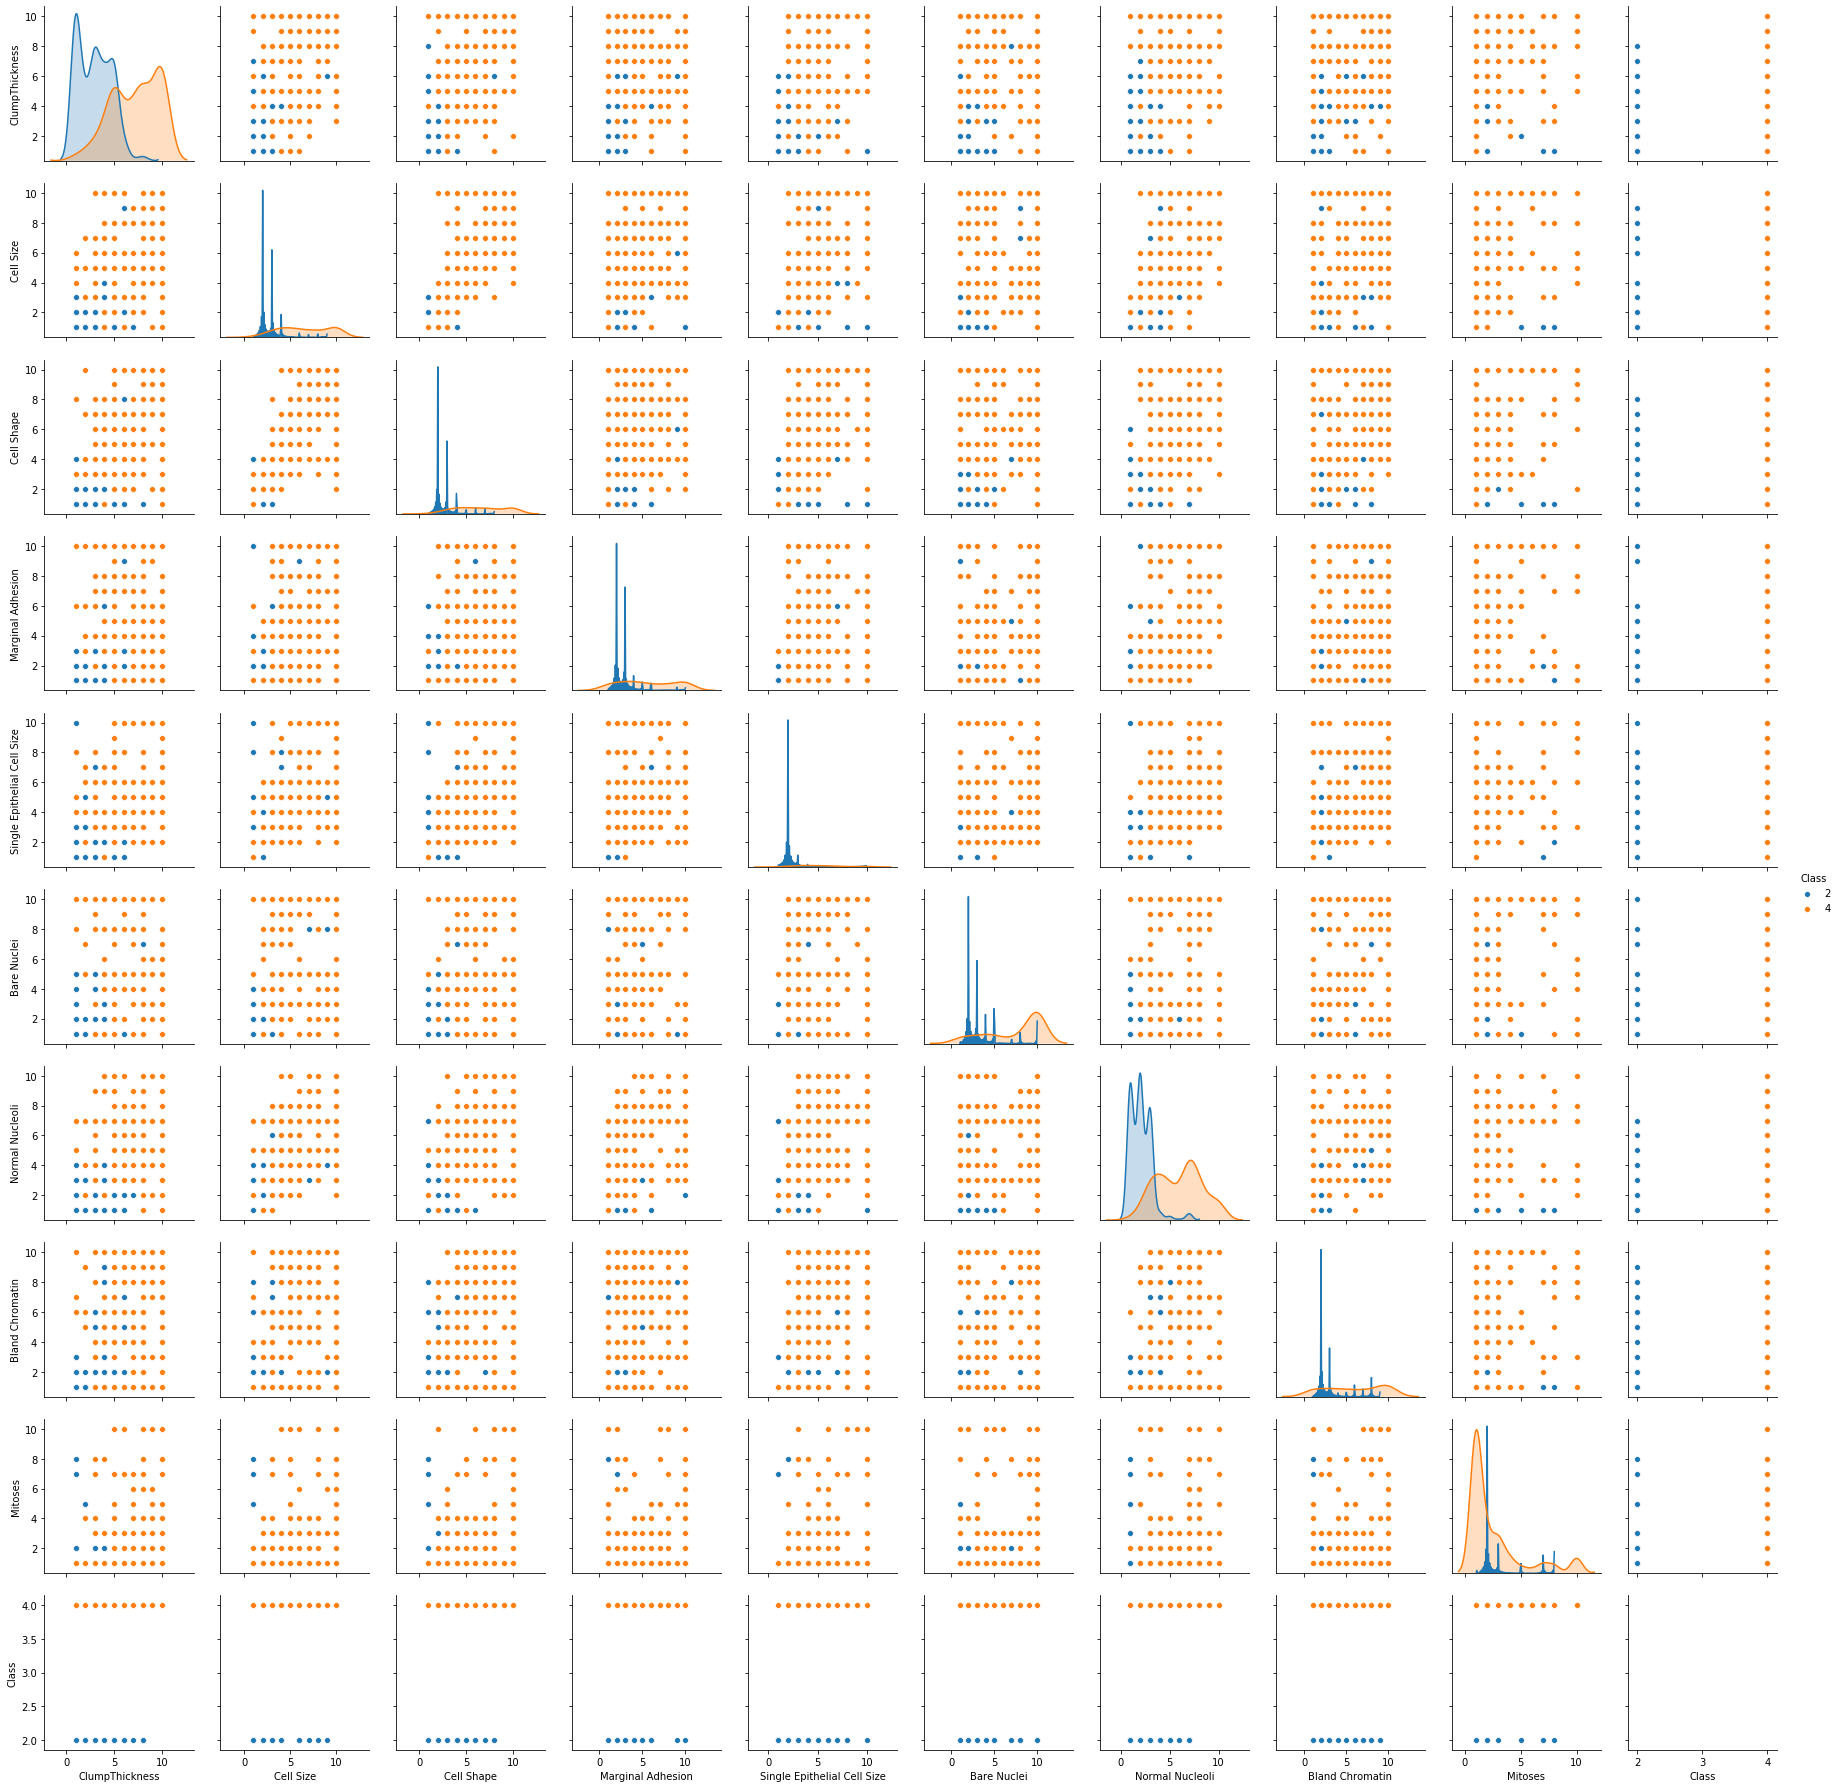

In [103]:
# Pair plot
sns.pairplot(cancer_1, hue = "Class")

# looking at the below pairplots, looks like "ChumpThinkness" is a very prominent feature, the 2 classes are clearly visible
# 


In [104]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [105]:
#Let us check for pair plots

In [106]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

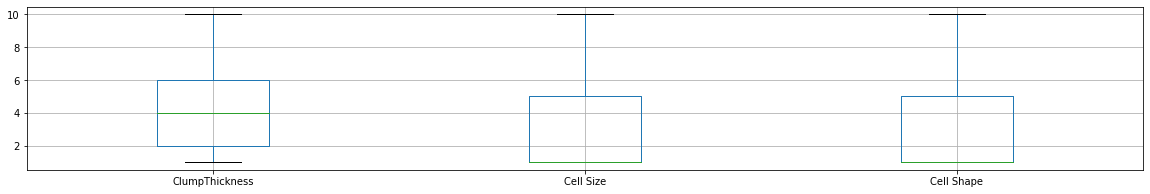

In [107]:
# We could see most of the outliers are now removed.
# ID column have been removed above
# Plotting Box plots for outliers detection

cancer_1.boxplot(figsize=(20,3),column=['ClumpThickness', 'Cell Size', 'Cell Shape'])



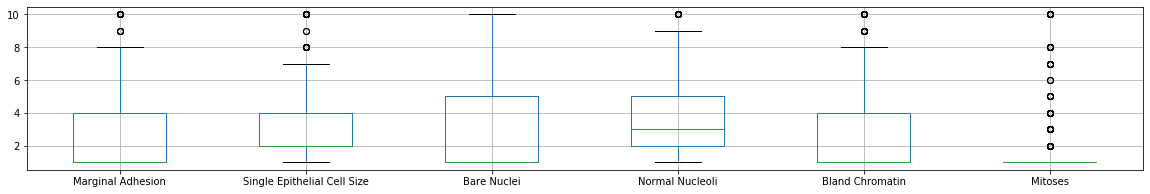

In [108]:
cancer_1.boxplot(figsize=(20,3),column=['Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'])
                         

In [109]:
pd.crosstab(cancer_1['Marginal Adhesion'], cancer_1['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [110]:
cancer_1['Marginal Adhesion']=np.where(cancer_1['Marginal Adhesion'] > 4,4,cancer_1['Marginal Adhesion'])

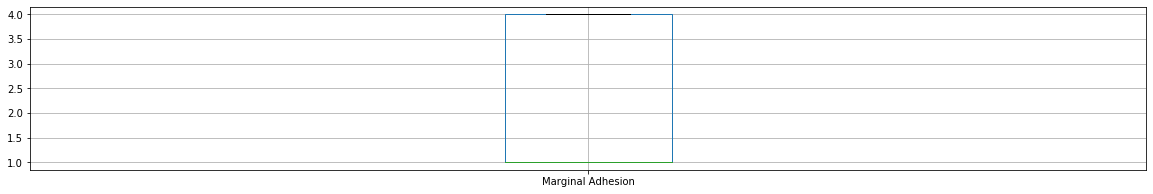

In [111]:
cancer_1.boxplot(figsize=(20,3),column=['Marginal Adhesion'])

In [115]:
# Single Epithelial Cell Size
pd.crosstab(cancer_1['Single Epithelial Cell Size'], cancer_1['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,20,170


In [116]:
cancer_1['Single Epithelial Cell Size']=np.where(cancer_1['Single Epithelial Cell Size'] > 4,4,cancer_1['Single Epithelial Cell Size'])


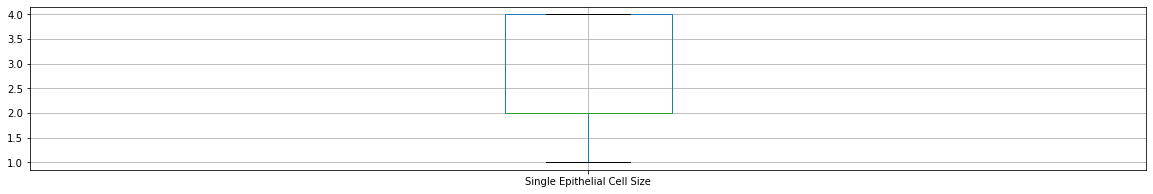

In [117]:
cancer_1.boxplot(figsize=(20,3),column=['Single Epithelial Cell Size'])

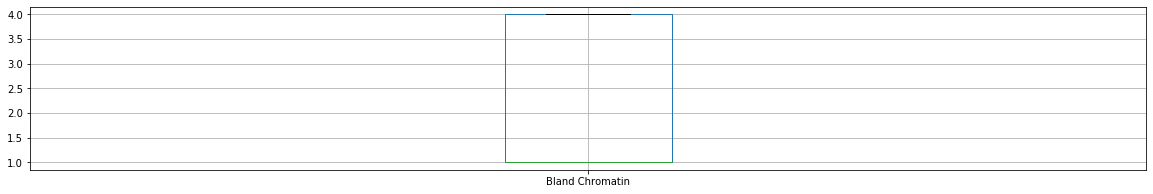

In [118]:
# Bland Chromatin
pd.crosstab(cancer_1['Bland Chromatin'], cancer_1['Class'])
cancer_1['Bland Chromatin']=np.where(cancer_1['Bland Chromatin'] > 4,4,cancer_1['Bland Chromatin'])
cancer_1.boxplot(figsize=(20,3),column=['Bland Chromatin'])

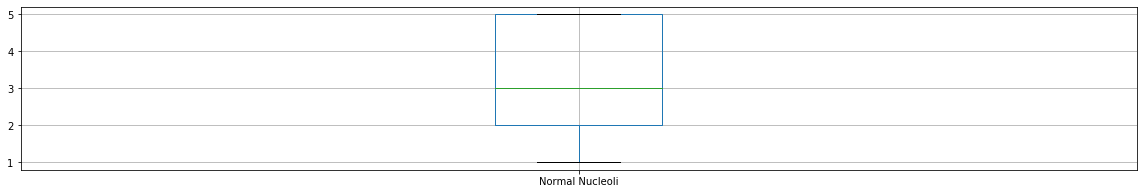

In [119]:
# check Normal Nucleoli
pd.crosstab(cancer_1['Normal Nucleoli'], cancer_1['Class'])
cancer_1['Normal Nucleoli']=np.where(cancer_1['Normal Nucleoli'] > 5,5,cancer_1['Normal Nucleoli'])
cancer_1.boxplot(figsize=(20,3),column=['Normal Nucleoli'])

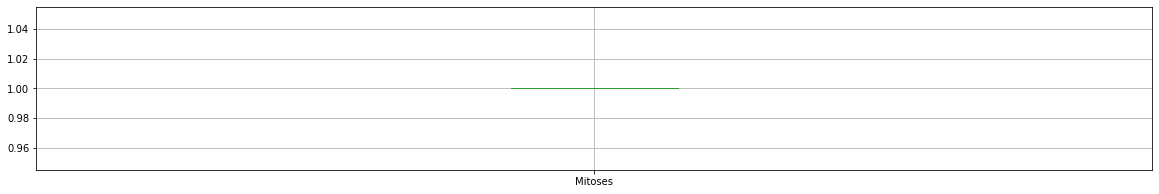

In [120]:
# check Mitoses
pd.crosstab(cancer_1['Mitoses'], cancer_1['Class'])
cancer_1['Mitoses']=np.where(cancer_1['Mitoses'] > 1,1,cancer_1['Mitoses'])
cancer_1.boxplot(figsize=(20,3),column=['Mitoses'])

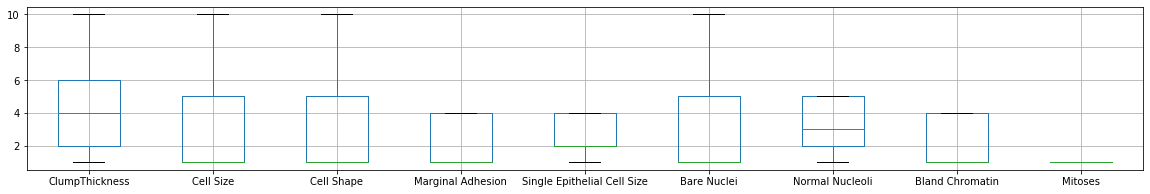

In [122]:
cancer_1.boxplot(figsize=(20,3),column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'])
 

# Q6 Create a covariance matrix for identifying Principal components

In [123]:
# PCA
# Step 1 - Create covariance matrix
# drop class column
cancer_1 = cancer_1.drop('Class',axis=1)
cancer_1.head(10)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,4,4,10,5,4,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,1
9,4,2,1,1,2,1,2,1,1


In [131]:
cov_matrix = np.cov(cancer_1.T)
print(cov_matrix)

[[ 7.9468256   5.4843418   5.42595232  2.03604561  1.57162477  6.02115833
   2.40623866  2.10485229  0.        ]
 [ 5.4843418   9.20015548  8.08513864  2.87757839  2.24884037  7.4763475
   3.22731278  2.88807334  0.        ]
 [ 5.42595232  8.08513864  8.69917509  2.73026475  2.12076747  7.46531917
   3.06925585  2.78153451  0.        ]
 [ 2.03604561  2.87757839  2.73026475  1.69790533  0.87476462  3.29685583
   1.25734862  1.11606418  0.        ]
 [ 1.57162477  2.24884037  2.12076747  0.87476462  0.92611212  2.36200872
   0.96295888  0.91193098  0.        ]
 [ 6.02115833  7.4763475   7.46531917  3.29685583  2.36200872 13.04697245
   3.66808327  3.04369439  0.        ]
 [ 2.40623866  3.22731278  3.06925585  1.25734862  0.96295888  3.66808327
   2.18029714  1.33625507  0.        ]
 [ 2.10485229  2.88807334  2.78153451  1.11606418  0.91193098  3.04369439
   1.33625507  1.72204371  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.  

# Q7 Identify eigen values and eigen vector

In [135]:
# Step 2- Get eigen values and eigen vector
from numpy import linalg as LA
eigval,eigenvec=LA.eig(cov_matrix)

In [141]:
print(eigval)

[34.12828018  4.39643843  3.57590288  0.27354863  1.02872336  0.81815472
  0.56252767  0.63591104  0.        ]


In [142]:
print(eigenvec)

[[-3.75528319e-01 -2.92108629e-01  8.77952000e-01 -4.51758396e-03
   3.42848488e-02 -4.03252016e-02  5.16458444e-03  1.63177496e-03
   0.00000000e+00]
 [-4.75535993e-01 -3.77612821e-01 -3.54296125e-01 -8.42618329e-02
  -1.30398969e-01 -6.69865443e-01 -9.63763247e-02 -1.53740942e-01
   0.00000000e+00]
 [-4.64791433e-01 -3.25184228e-01 -3.02168862e-01 -3.03602254e-04
   5.18657449e-01  5.57419229e-01  8.40428143e-02  1.15363794e-02
   0.00000000e+00]
 [-1.77666593e-01  2.59771000e-02 -6.43989690e-02 -1.43129622e-01
  -2.62737582e-01 -3.37821626e-02  6.37651587e-01  6.82901632e-01
   0.00000000e+00]
 [-1.33722835e-01 -2.14476199e-02 -5.14901064e-02  9.53912788e-01
  -1.74584421e-01  2.03921451e-02 -8.61118813e-02  1.75346943e-01
   0.00000000e+00]
 [-5.43775160e-01  8.14568516e-01  2.86678652e-02 -2.26471070e-02
   1.51684629e-01 -9.21925092e-02 -6.94896755e-02 -5.58163942e-02
   0.00000000e+00]
 [-2.01789013e-01  1.27388993e-02 -4.12008960e-02 -2.12270573e-02
  -6.32149324e-01  3.7078546

# Q8 Find variance and cumulative variance by each eigen vector

In [148]:
# 
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 75.14017109  84.81980142  92.69286015  94.95779847  96.7591282
  98.15921236  99.39772848 100.         100.        ]


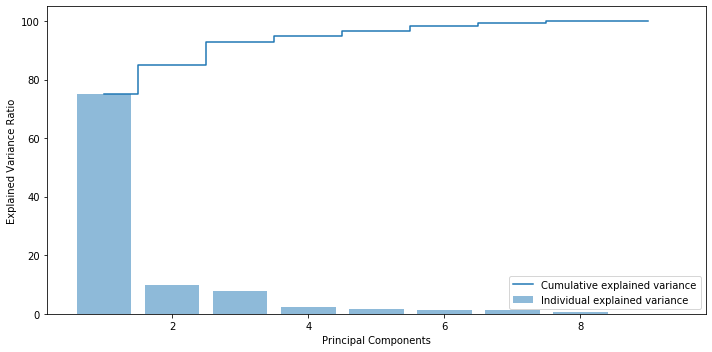

In [150]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [168]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cancer_1)
cancer_pca = pca.transform(cancer_1)


In [169]:
cancer_pca.shape

(681, 2)

In [170]:
print(pca.components_)

[[ 0.37552832  0.47553599  0.46479143  0.17766659  0.13372283  0.54377516
   0.20178901  0.1759417  -0.        ]
 [ 0.29210863  0.37761282  0.32518423 -0.0259771   0.02144762 -0.81456852
  -0.0127389   0.03895341 -0.        ]]


# Q10 Find correlation between components and features

In [172]:
df_comp = pd.DataFrame(pca.components_, columns=list(cancer_1))

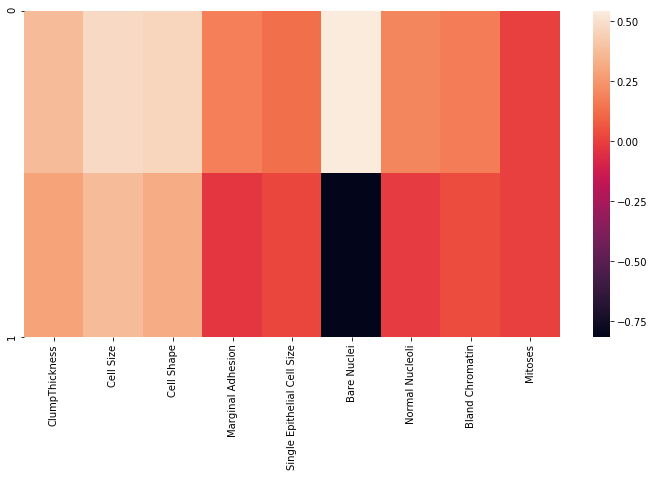

In [173]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [206]:
jokes = pd.read_csv("jokes.csv")
jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [207]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [208]:
jokes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.0,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.0,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.0,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.0,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.0,99.0
...,...,...,...,...,...,...,...,...
Joke96,24983.0,58.541104,48.130562,-9.95,3.300,99.00,99.0,99.0
Joke97,24983.0,58.017246,48.164681,-9.95,3.590,99.00,99.0,99.0
Joke98,24983.0,57.061650,48.717455,-9.95,2.670,99.00,99.0,99.0
Joke99,24983.0,55.753357,49.237139,-9.95,1.335,99.00,99.0,99.0


In [209]:
jokes_1 = jokes.drop('NumJokes',axis=1)
jokes_1.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [210]:
ratings = jokes_1.iloc[0:200,0:]
ratings.head(10)


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [211]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [224]:
ratings.replace(99.00, 0, inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [225]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Joke1,200.0,0.53005,4.507771,-9.71,-0.8525,0.00,3.4125,9.27
Joke2,200.0,0.59390,4.915306,-9.95,-2.5950,0.00,4.5350,9.27
Joke3,200.0,0.23765,4.471239,-9.71,-0.7275,0.00,2.3300,9.27
Joke4,200.0,-0.70100,3.863859,-9.76,-1.6850,0.00,0.0000,8.83
Joke5,200.0,-0.03790,5.433866,-9.81,-4.2200,0.34,4.2325,9.22
...,...,...,...,...,...,...,...,...
Joke96,200.0,0.41755,2.981439,-9.51,0.0000,0.00,0.0000,9.22
Joke97,200.0,0.75500,3.243612,-9.13,0.0000,0.00,0.1100,9.17
Joke98,200.0,0.09370,3.497441,-9.66,0.0000,0.00,0.0000,9.22
Joke99,200.0,0.13500,3.265586,-9.76,0.0000,0.00,0.0000,8.98


In [226]:
rating_mean = ratings.mean()

In [227]:
print(rating_mean)

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64


In [228]:
rating_mean_decending = sorted(rating_mean, reverse=True)

In [231]:
rating_mean_decending

[4.055400000000001,
 3.611500000000002,
 3.5715,
 3.2231500000000013,
 3.18995,
 3.052400000000002,
 2.8618499999999982,
 2.8499999999999996,
 2.779549999999999,
 2.6570999999999994,
 2.6388999999999982,
 2.5604499999999994,
 2.53785,
 2.359749999999999,
 2.29775,
 2.2971999999999992,
 2.2656500000000013,
 2.109949999999999,
 1.9694999999999991,
 1.8634500000000003,
 1.8097000000000008,
 1.45255,
 1.44285,
 1.3908500000000004,
 1.3419500000000002,
 1.3200499999999997,
 1.1667500000000002,
 1.16255,
 1.1567999999999998,
 1.1558500000000003,
 1.15585,
 1.1210000000000002,
 1.0057000000000003,
 0.9915000000000002,
 0.93365,
 0.8946999999999996,
 0.8823500000000003,
 0.8364999999999999,
 0.82085,
 0.7550000000000003,
 0.7236499999999999,
 0.6704499999999999,
 0.6379,
 0.6351000000000001,
 0.6049,
 0.5938999999999995,
 0.5852499999999998,
 0.5816500000000001,
 0.5773499999999999,
 0.5647500000000001,
 0.5625999999999999,
 0.5613499999999998,
 0.5300499999999997,
 0.5244000000000001,
 0.5195

In [230]:
# Top Ten jokes 
rating_mean.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64